# Situation Problem

### Esteban Russek
### A00827996

#### adult.csv

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

     |████████████████████████████████| 27.7 MB 4.5 MB/s             |███████████████████████████████▍| 27.2 MB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [7]:
df = pd.read_csv('datasets/adult.csv')
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,the label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [17]:
x = df.columns.tolist()
x.sort()
x

['age',
 'capital-gain',
 'capital-loss',
 'education',
 'education-num',
 'fnlwgt',
 'hours-per-week',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'the label',
 'workclass']

## Which are the critic variables that we are looking for?

In [16]:
df.loc[:,['age', 'marital-status', 'sex']]

,age,marital-status,sex
0,39,Never-married,Male
1,50,Married-civ-spouse,Male
2,38,Divorced,Male
3,53,Married-civ-spouse,Male
4,28,Married-civ-spouse,Female
...,...,...,...
32559,22,Never-married,Male
32560,52,Married-civ-spouse,Female
32561,52,test_category_male,Male
32562,52,test_category_male,Male


## With the loc from pandas, we can create a new table only using the critical variables that we are looking for so we can answer the following question. 

## What is the average age of male and women of each martial status?

In [22]:
myPivot = pd.pivot_table(df, 
                         index = ['sex'],
                         values = ['age'],
                         aggfunc = ['median'],
                         columns = ['marital-status'],
                         margins = True
                        )
myPivot

median                                         \
                     age                                          
marital-status  Divorced  Married-AF-spouse  Married-civ-spouse   
sex                                                               
 Female             43.0               31.0                38.0   
 Male               42.0               29.0                43.0   
All                 42.0               30.0                42.0   

                                                                          \
                                                                           
marital-status  Married-spouse-absent  Never-married  Separated  Widowed   
sex                                                                        
 Female                          39.0           25.0       39.0     60.0   
 Male                            41.0           25.0       38.0     62.5   
All                              40.0           25.0       38.0     60.0   

                                                              
                                                              
marital-status  test_category_female  test_category_male All  
sex                                                           
 Female                         52.0                 NaN  35  
 Male                            NaN                52.0  38  
All                             52.0                52.0  37

## After creating a pivot table that shows the median age of male, female and all we can see the avergae ages of the people on the list of every martial-status. And with this we can conclude that the younger people on the list have never been married, and the older people on the list are widowed. And with this we can answer the question. 

## Graphics of the results 

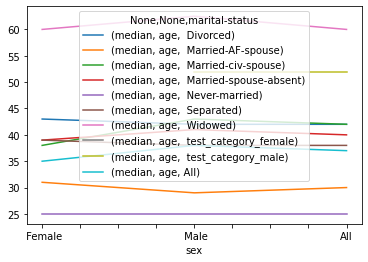

In [30]:
myPivot.plot(kind = 'line')
plt.show()

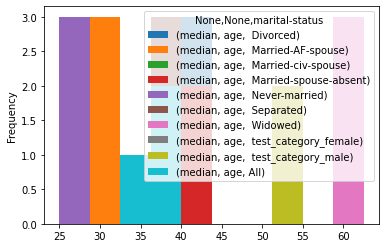

In [39]:
myPivot.plot(kind = 'hist')
plt.show()

## With the graphics we can display the infromation with the table in an easier way. I used two different graphs: line and hist. In the first graph, we can see its a line graph, the x coordinate is the sex of the people, and the y coordinate are the ages, and the colors depend on the marital status, and with that we can see clearer the average oge of each marital status. In the second graph, which is a hist graph, and we can see the ages and the frequency on the x and y coordinates, and the colors depend of the martial status.

## Some complications that I had was the graphs, because marital status and sex are strings and not float or intigers, in some graphs I couldn't graph the table. And it was really hard to find the ones where I could graph them becuase most of the graphs i tried first wouldn't let me. 